<a href="https://colab.research.google.com/github/cloveropen/blood/blob/master/infu_train20210915.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-or9quisp
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-or9quisp
     |████████████████████████████████| 636 kB 6.2 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=64542 sha256=09b1ccd96c0f96e89c3302a33159354ae70ca8d781aa139b1c496f3edc524eac
  Stored in directory: /tmp/pip-ephem-wheel-cache-qkqt1gbr/wheels/24/1d/09/8167de727fe5b74f832b6fcb5d9069d8f03ca29f337bfe484d
Successfully built fvcore
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Cloning into 'detectron2_repo'...
remote: Enumerating objects: 13005, done.
remote: Counting objects: 100% (506/506), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 13005 (delta 290), reused 420 (delta 256), pack-reused 12499
Receiving objects: 100% (13005/13005), 5.58 MiB 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
DatasetCatalog.clear()
register_coco_instances("fruits_nuts", {}, "/content/drive/MyDrive/app/infu20210915/infu_coco.json", "/content/drive/MyDrive/app/infu20210915/images")

In [7]:
from detectron2.data import MetadataCatalog
fruits_nuts_metadata = MetadataCatalog.get("fruits_nuts")
print('fruits_nuts_metadata',fruits_nuts_metadata)

fruits_nuts_metadata Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/app/infu20210915/images', json_file='/content/drive/MyDrive/app/infu20210915/infu_coco.json', name='fruits_nuts', thing_classes=['bottle_end', 'bag_end', 'bag_normal', 'bottle_normal'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2, 4: 3})


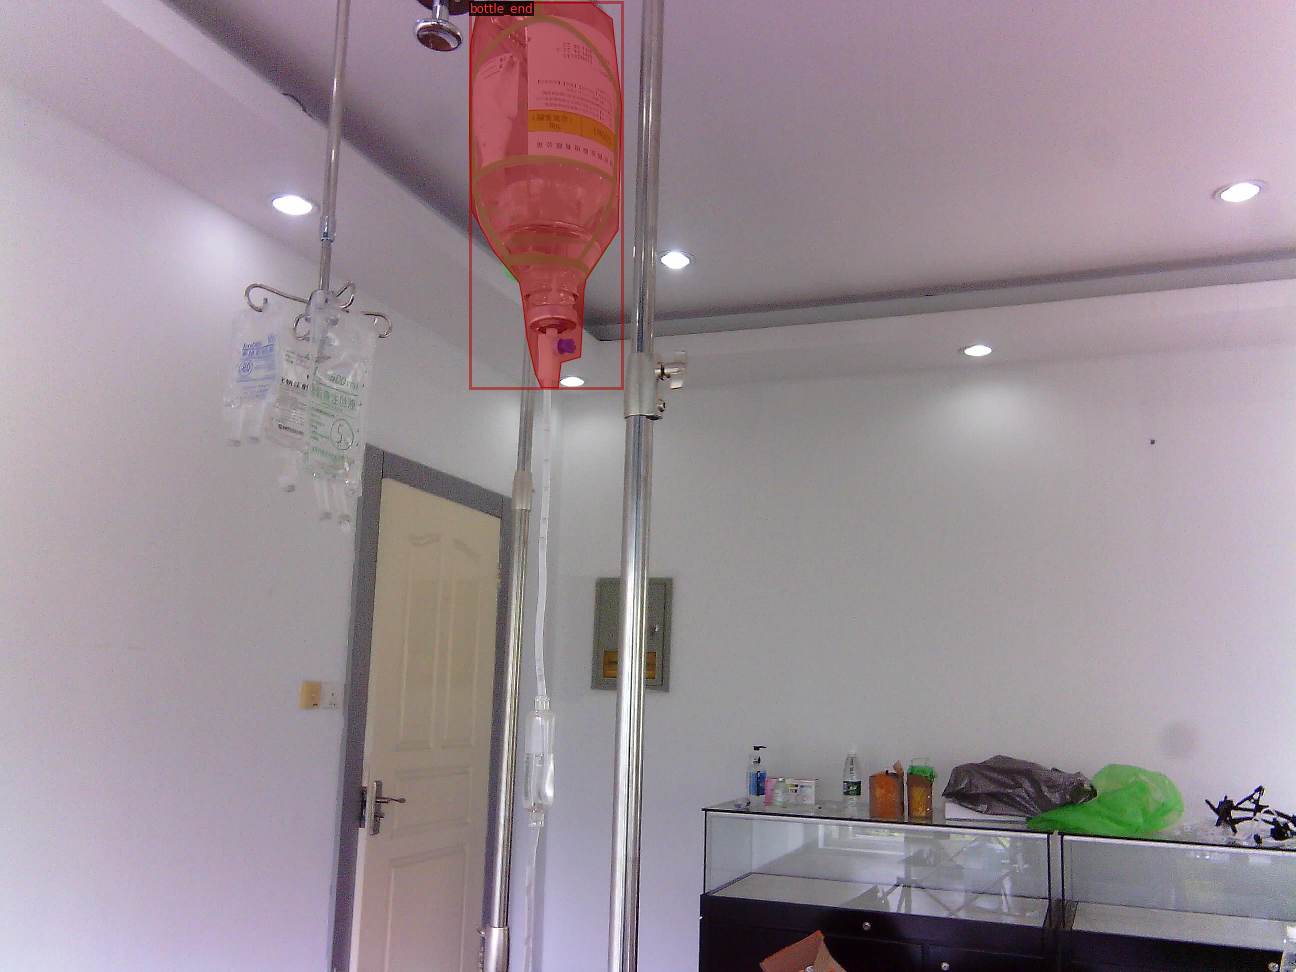

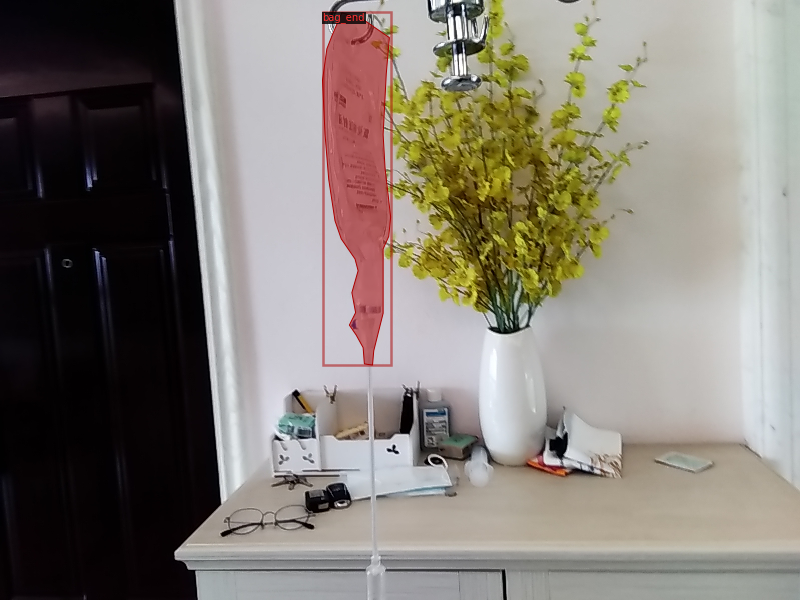

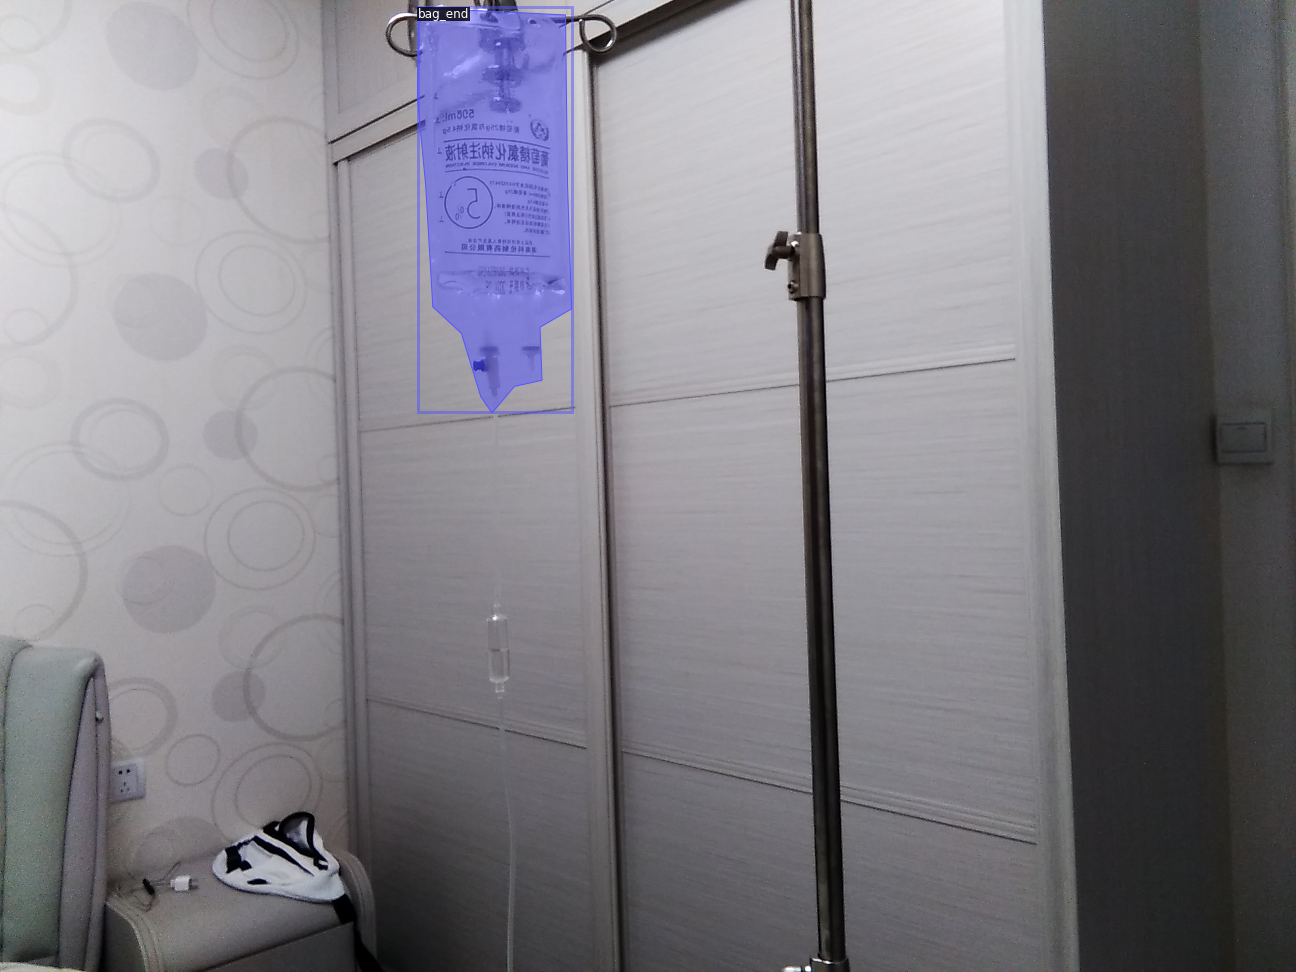

In [8]:
import random
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog
from google.colab.patches import cv2_imshow
import cv2

dataset_dicts = DatasetCatalog.get("fruits_nuts")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=fruits_nuts_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(
    "./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
cfg.DATASETS.TRAIN = ("fruits_nuts",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.01
cfg.SOLVER.MAX_ITER = (
    12000
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    128
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # 3 classes (data, fig, hazelnut)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/15 01:01:30 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:06, 26.8MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to

[09/15 01:01:39 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[09/15 01:02:06 d2.utils.events]:  eta: 4:23:08  iter: 19  total_loss: 2.354  loss_cls: 1.434  loss_box_reg: 0.2926  loss_mask: 0.6807  loss_rpn_cls: 0.02685  loss_rpn_loc: 0.004827  time: 1.3043  data_time: 0.0470  lr: 0.00019981  max_mem: 2338M
[09/15 01:02:31 d2.utils.events]:  eta: 4:19:25  iter: 39  total_loss: 1.367  loss_cls: 0.4181  loss_box_reg: 0.394  loss_mask: 0.5092  loss_rpn_cls: 0.01656  loss_rpn_loc: 0.004226  time: 1.2870  data_time: 0.0070  lr: 0.00039961  max_mem: 2338M
[09/15 01:02:57 d2.utils.events]:  eta: 4:15:22  iter: 59  total_loss: 1.014  loss_cls: 0.2586  loss_box_reg: 0.4786  loss_mask: 0.2732  loss_rpn_cls: 0.00626  loss_rpn_loc: 0.004384  time: 1.2803  data_time: 0.0076  lr: 0.00059941  max_mem: 2338M
[09/15 01:03:21 d2.utils.events]:  eta: 4:14:33  iter: 79  total_loss: 0.7524  loss_cls: 0.175  loss_box_reg: 0.3802  loss_mask: 0.1608  loss_rpn_cls: 0.01007  loss_rpn_loc: 0.003913  time: 1.2689  data_time: 0.0072  lr: 0.00079921  max_mem: 2338M
[09/15 01: